# 샌프란 시스코 범죄 분류 (multi classification)

### - Data field
1. Dates = 범죄가 일어난 시간
2. Category = 범죄의 종류, (타겟 레이블)
3. Descript = 범죄에 대한 간략한 설명
4. DayOfWeek = 요일
5. PdDistrict = 경찰 관할 구역
6. Resolution = 해결 상태
7. Address = 주소
8. X = 경도
9. Y = 위도

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [2]:
train = pd.read_csv("/kaggle/input/sf-crime/train.csv.zip",parse_dates=["Dates"])
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Category = target label

In [3]:
test =pd.read_csv("/kaggle/input/sf-crime/test.csv.zip",parse_dates=["Dates"])
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


no descript, resolution

In [4]:
train.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
X              34243
Y              34243
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null datetime64[ns]
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB


트레인 데이터보다 테스트 데이터의 양이 많음 정확성에 영향이 있나?

In [7]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [8]:
test.Dates.describe()

count                  884262
unique                 392173
top       2010-01-01 00:01:00
freq                      150
first     2003-01-01 00:01:00
last      2015-05-10 23:59:00
Name: Dates, dtype: object

In [9]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [10]:
train["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [11]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [13]:
train.duplicated().sum()

2323

In [14]:
train.drop_duplicates(inplace=True)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

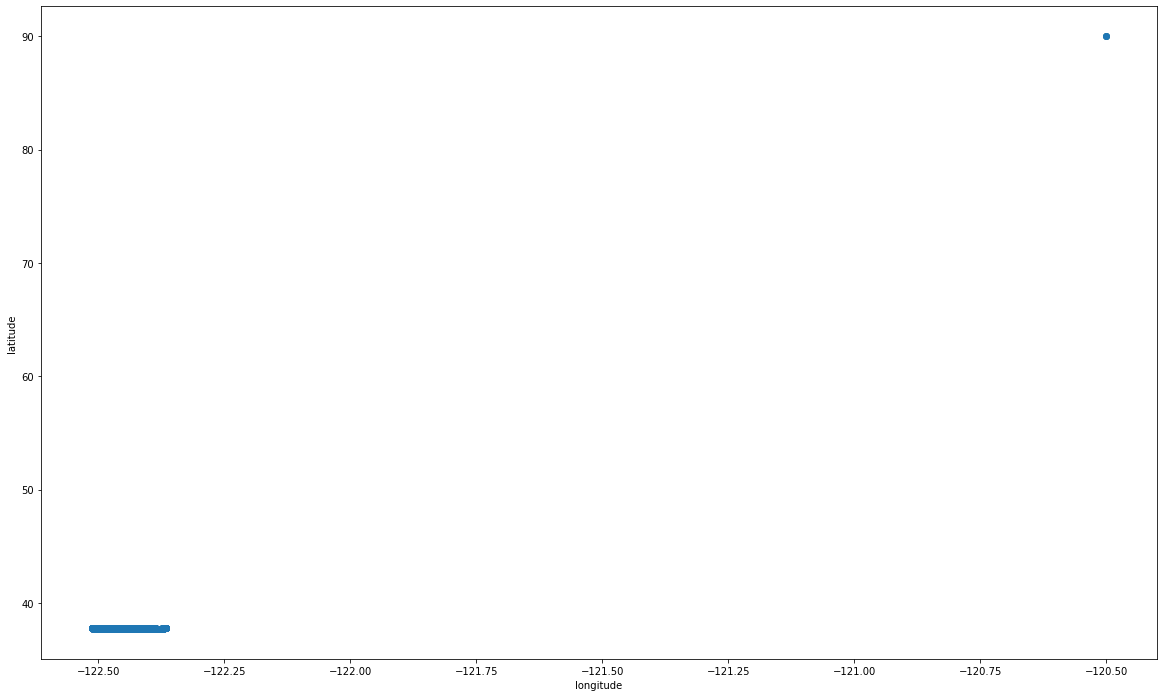

In [16]:
ln = list(train.X)
la = list(train.Y)
plt.figure(figsize=(20,12))
plt.plot(ln,la, '.', alpha =1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [17]:
print(train.loc[train.Y > 50].count())
train.loc[train.Y > 50].head(5)

Dates         67
Category      67
Descript      67
DayOfWeek     67
PdDistrict    67
Resolution    67
Address       67
X             67
Y             67
dtype: int64


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0


In [18]:
abnormal = train.loc[train.Y > 50]

In [19]:
abnormal["Category"].value_counts(normalize=True)

OTHER OFFENSES           0.253731
LARCENY/THEFT            0.223881
VEHICLE THEFT            0.134328
WARRANTS                 0.119403
NON-CRIMINAL             0.059701
ASSAULT                  0.059701
DISORDERLY CONDUCT       0.029851
SUSPICIOUS OCC           0.029851
STOLEN PROPERTY          0.014925
SEX OFFENSES FORCIBLE    0.014925
TRESPASS                 0.014925
BURGLARY                 0.014925
ROBBERY                  0.014925
VANDALISM                0.014925
Name: Category, dtype: float64

In [20]:
normal = train.loc[train.Y < 50]

In [21]:
normal["Category"].value_counts(normalize=True)

LARCENY/THEFT                  0.199056
OTHER OFFENSES                 0.143827
NON-CRIMINAL                   0.104962
ASSAULT                        0.087718
DRUG/NARCOTIC                  0.061575
VEHICLE THEFT                  0.061322
VANDALISM                      0.050910
WARRANTS                       0.048120
BURGLARY                       0.041796
SUSPICIOUS OCC                 0.035850
MISSING PERSON                 0.029314
ROBBERY                        0.026251
FRAUD                          0.018999
FORGERY/COUNTERFEITING         0.012096
SECONDARY CODES                0.011396
WEAPON LAWS                    0.009764
PROSTITUTION                   0.008503
TRESPASS                       0.008356
STOLEN PROPERTY                0.005180
SEX OFFENSES FORCIBLE          0.005001
DISORDERLY CONDUCT             0.004923
DRUNKENNESS                    0.004884
RECOVERED VEHICLE              0.003577
KIDNAPPING                     0.002672
DRIVING UNDER THE INFLUENCE    0.002590


아웃라이어 데이터를 살펴보니 노말 데이터에 비해 특정하게 어떠한 사건의 비율이 높다던가 하는 것이 없으므로 결과에 영향이 없다고 판단, 제거?

In [22]:
train = train.loc[train.Y < 50]

In [23]:
train["year"] = train["Dates"].dt.year
train["month"] = train["Dates"].dt.month
train["day"] = train["Dates"].dt.day
train["hour"] = train["Dates"].dt.hour
train['minute'] = train['Dates'].dt.minute
train['n_days'] = (
        train['Dates'] - train['Dates'].min()).apply(lambda x: x.days)

In [24]:
train.head(20)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,4510
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,5,13,23,30,4510
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23,30,4510
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,13,23,30,4510
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015,5,13,23,0,4510
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,5,13,23,0,4510


In [25]:
test["year"] = test["Dates"].dt.year
test["month"] = test["Dates"].dt.month
test["day"] = test["Dates"].dt.day
test["hour"] = test["Dates"].dt.hour
test['minute'] = test['Dates'].dt.minute
test['n_days'] = (
        test['Dates'] - test['Dates'].min()).apply(lambda x: x.days)

In [26]:
train["street"] = train["Address"].str.contains("ST",case=False)

In [27]:
train["block"] = train["Address"].str.contains("block",case=False)
train["av"] = train["Address"].str.contains("av",case=False)

In [28]:
train["cross"] = train["Address"].str.contains("/",case=False)

In [29]:
test["street"] = test["Address"].str.contains("ST",case=False)

In [30]:
test["block"] = test["Address"].str.contains("block",case=False)
test["av"] = test["Address"].str.contains("av",case=False)

In [31]:
test["cross"] = test["Address"].str.contains("/",case=False)

In [32]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(train["Address"])

Using TensorFlow backend.


In [33]:
tk.word_index

{'st': 1,
 'of': 2,
 'block': 3,
 'av': 4,
 '0': 5,
 '100': 6,
 '800': 7,
 'mission': 8,
 'market': 9,
 '200': 10,
 '400': 11,
 '300': 12,
 'bryant': 13,
 '500': 14,
 'bl': 15,
 '600': 16,
 '700': 17,
 '1000': 18,
 'geary': 19,
 'turk': 20,
 '900': 21,
 '3rd': 22,
 'eddy': 23,
 '1200': 24,
 'dr': 25,
 '1100': 26,
 'ellis': 27,
 '16th': 28,
 '6th': 29,
 'ofarrell': 30,
 '1300': 31,
 '1400': 32,
 '2000': 33,
 '1500': 34,
 'jones': 35,
 'hyde': 36,
 'folsom': 37,
 '1600': 38,
 'leavenworth': 39,
 '1700': 40,
 'polk': 41,
 'golden': 42,
 'gate': 43,
 'larkin': 44,
 'taylor': 45,
 'harrison': 46,
 'powell': 47,
 'vanness': 48,
 '1800': 49,
 'post': 50,
 'haight': 51,
 '24th': 52,
 'fillmore': 53,
 'sutter': 54,
 'howard': 55,
 'potrero': 56,
 'california': 57,
 '17th': 58,
 'valencia': 59,
 '18th': 60,
 'van': 61,
 'ness': 62,
 'stockton': 63,
 'wy': 64,
 '2300': 65,
 'san': 66,
 '19th': 67,
 '20th': 68,
 '7th': 69,
 '2100': 70,
 '5th': 71,
 'bay': 72,
 '2200': 73,
 '4th': 74,
 'mason': 75,

In [34]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,4512,False,True,True,False
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,4512,True,False,True,True
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,4512,True,True,False,False
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False


In [35]:
train.year.value_counts(normalize=True)

2013    0.086120
2014    0.085151
2003    0.084199
2004    0.083578
2012    0.081719
2005    0.080577
2008    0.079912
2006    0.079612
2009    0.078536
2007    0.077474
2011    0.075914
2010    0.075776
2015    0.031430
Name: year, dtype: float64

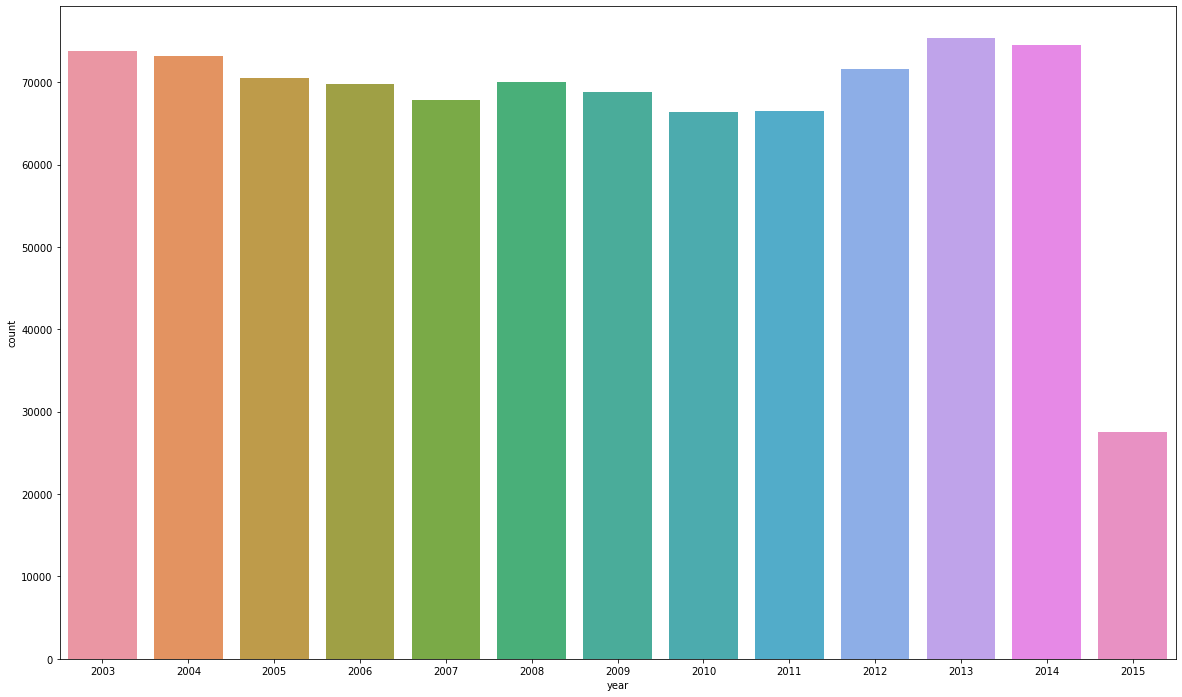

In [36]:
plt.figure(figsize=(20,12))
sns.countplot(x="year", data=train)

다른 년도에 비해 2015년의 데이터가 유독 작은데 모델이 편견을 가질 수 있지 않나?

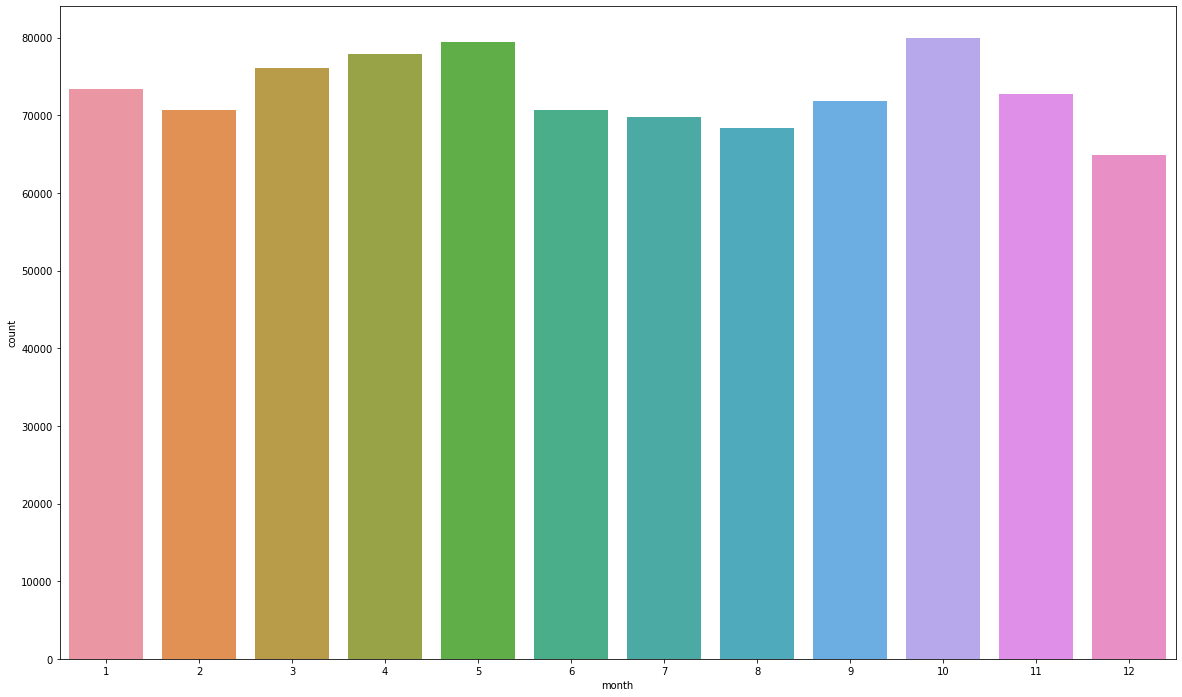

In [37]:
plt.figure(figsize=(20,12))
sns.countplot(x="month", data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

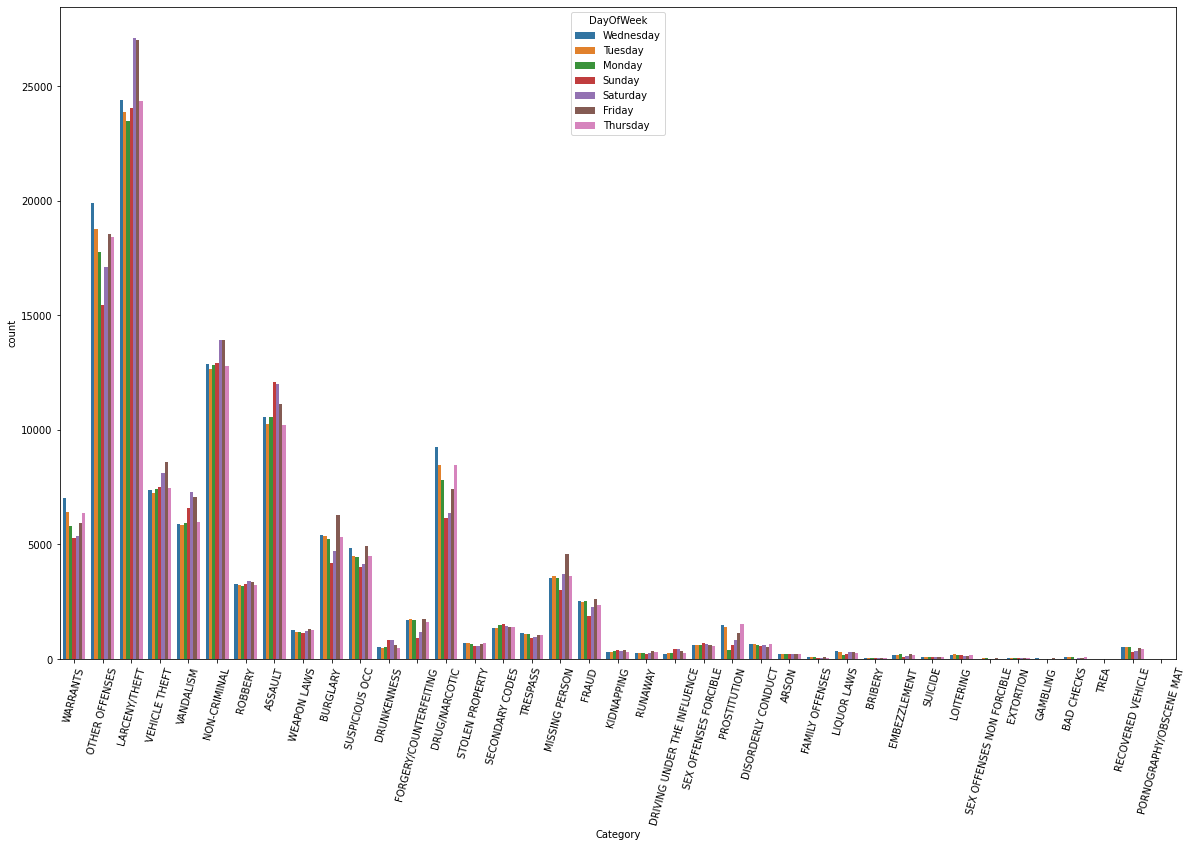

In [38]:
plt.figure(figsize=(20,12))
sns.countplot(train["Category"],hue=train["DayOfWeek"])
plt.xticks(rotation=75)

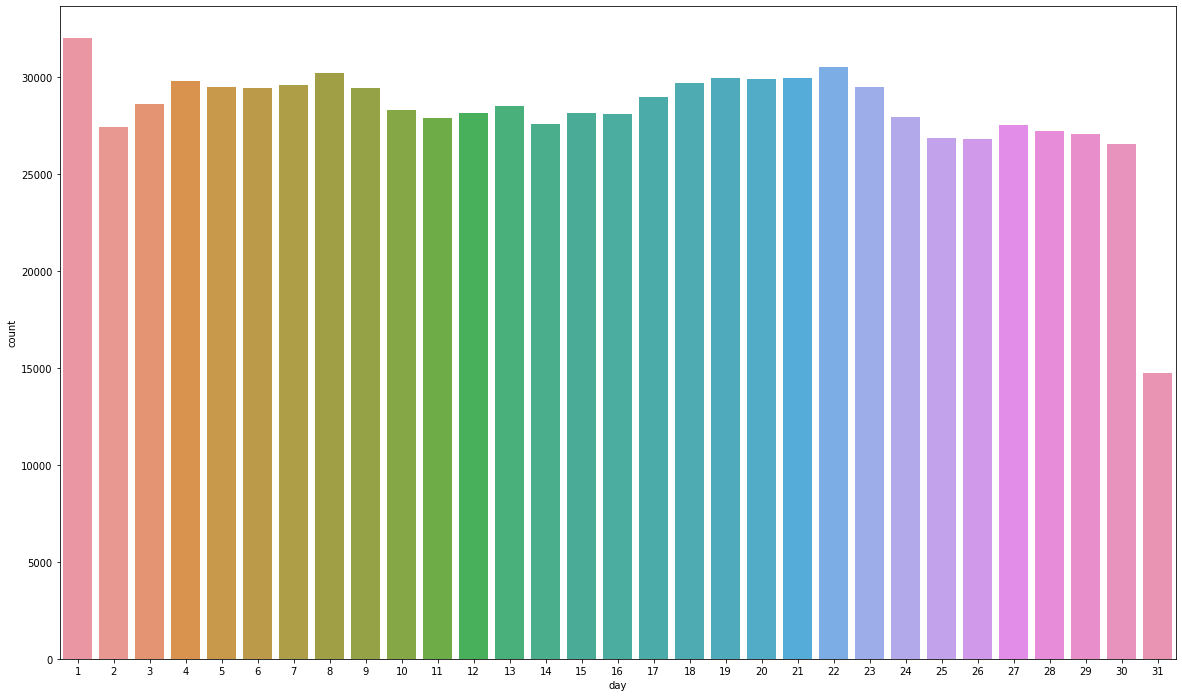

In [39]:
plt.figure(figsize=(20,12))
sns.countplot(x="day", data=train)

범죄는 월초에 가장 많이 발생한다. 31일이 범죄가 적다고 가정할 수 없는 이유는 30일은 모든월에 있는 반면 31일은 특정달에만 있기때문에 카운트가 부족함.

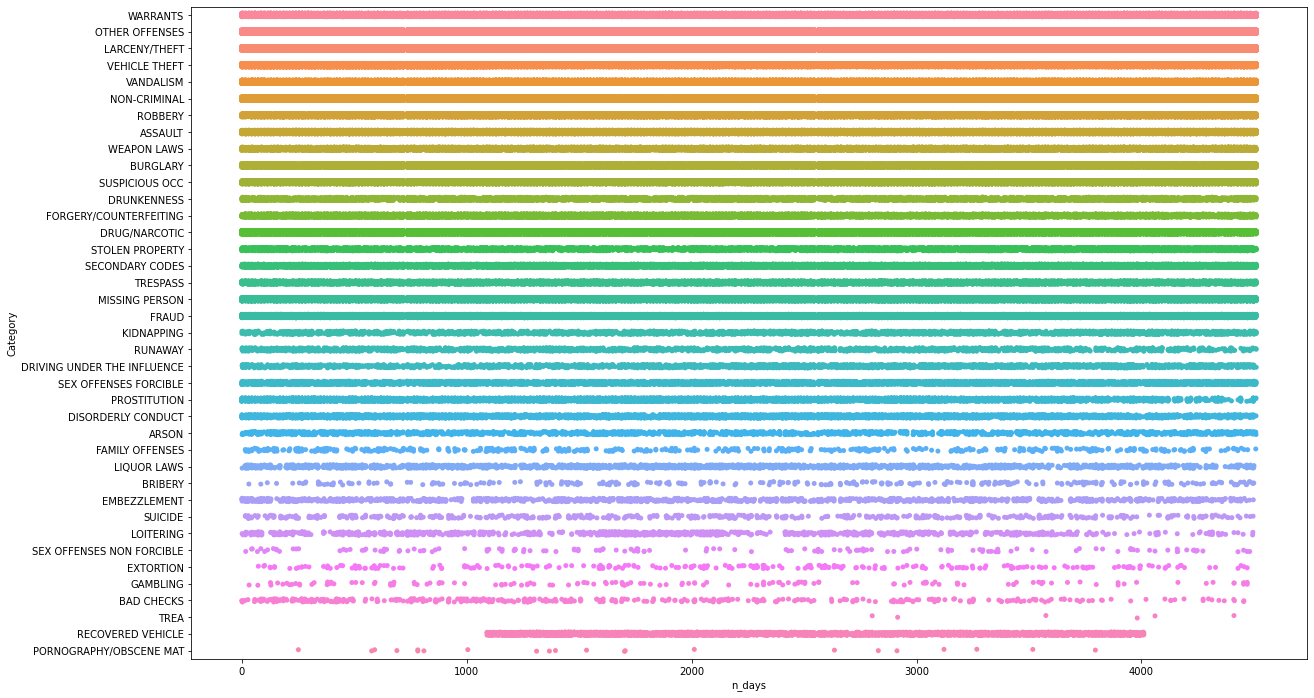

In [40]:
plt.figure(figsize=(20,12))
sns.stripplot(train["n_days"],train["Category"])

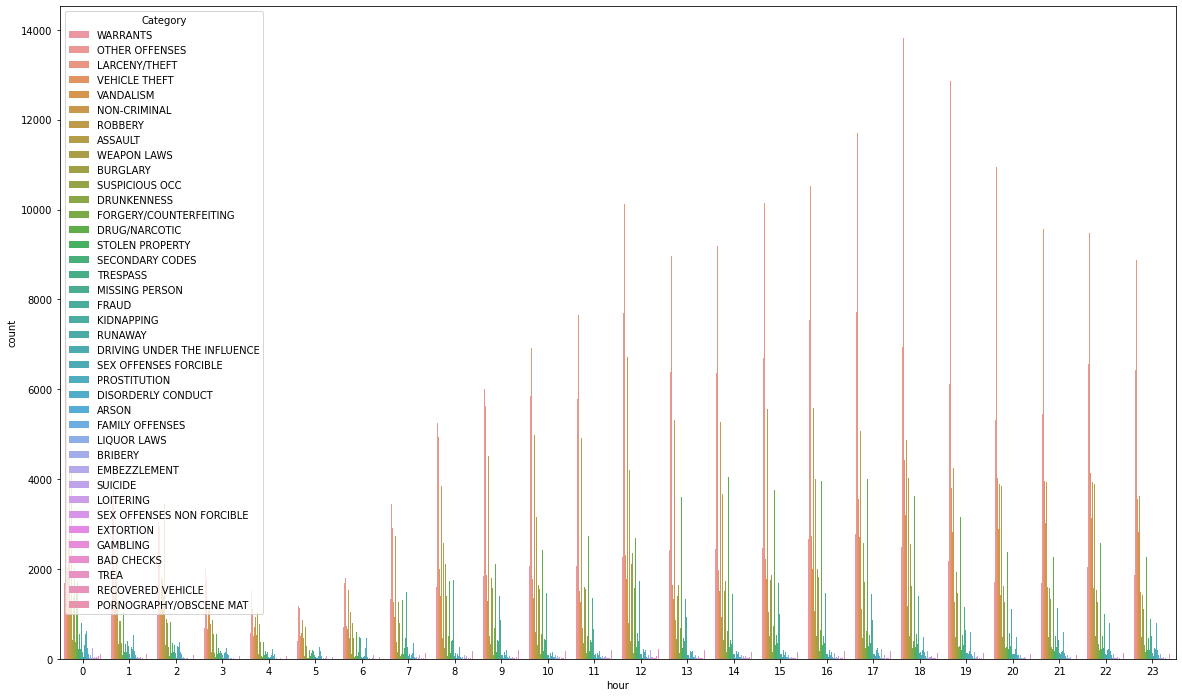

In [41]:
plt.figure(figsize=(20,12))
sns.countplot(x="hour", data=train, hue="Category")

시간별 범죄 카테고리의 분포를 시각화하는 그래프? ( 카테고리에 따른 시간별 범죄횟수 그래프)

In [42]:
train.groupby("Category")["hour"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ARSON,1512.0,11.216270,7.894417,0.0,3.00,11.0,19.00,23.0
ASSAULT,76811.0,12.746221,6.981106,0.0,8.00,14.0,19.00,23.0
BAD CHECKS,406.0,10.640394,5.762693,0.0,8.00,12.0,15.00,23.0
BRIBERY,289.0,13.498270,6.761885,0.0,10.00,15.0,19.00,23.0
BURGLARY,36599.0,12.948359,6.373124,0.0,8.00,14.0,18.00,23.0
DISORDERLY CONDUCT,4311.0,10.589422,6.652342,0.0,6.00,9.0,16.00,23.0
DRIVING UNDER THE INFLUENCE,2268.0,10.814374,9.327139,0.0,1.00,9.0,21.00,23.0
DRUG/NARCOTIC,53919.0,14.088410,5.746734,0.0,11.00,15.0,18.00,23.0
DRUNKENNESS,4277.0,12.661913,8.080181,0.0,3.00,15.0,20.00,23.0


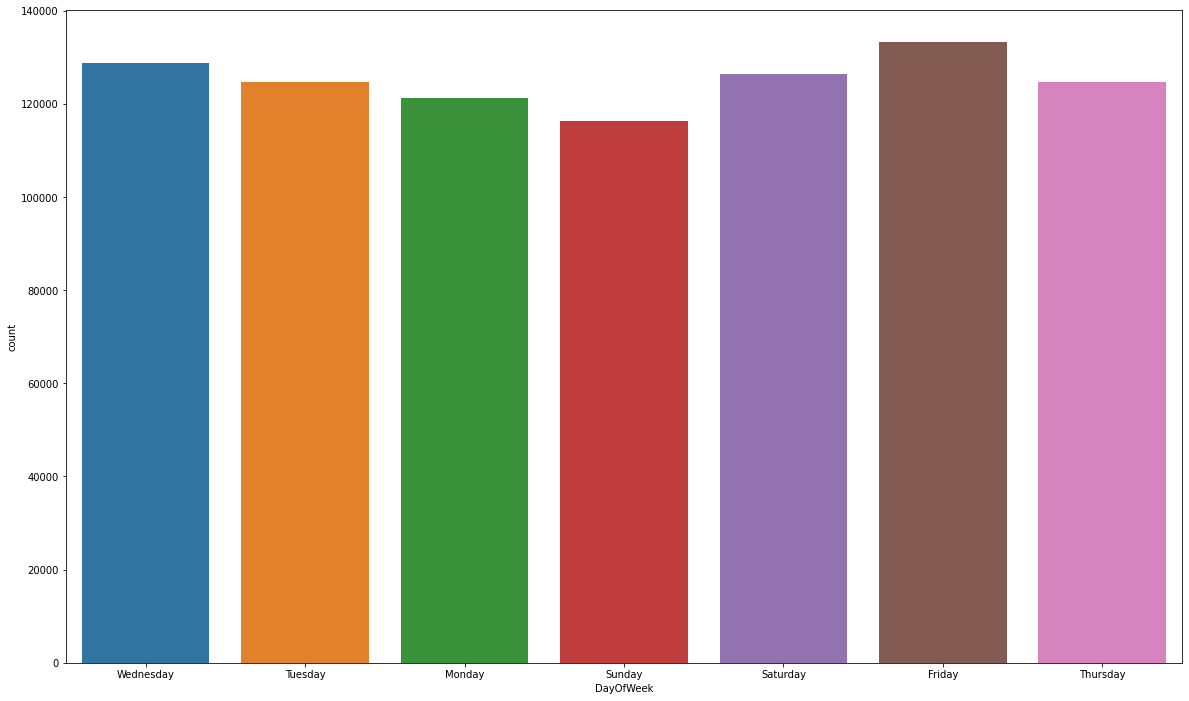

In [43]:
plt.figure(figsize=(20,12))
sns.countplot(x="DayOfWeek", data=train)

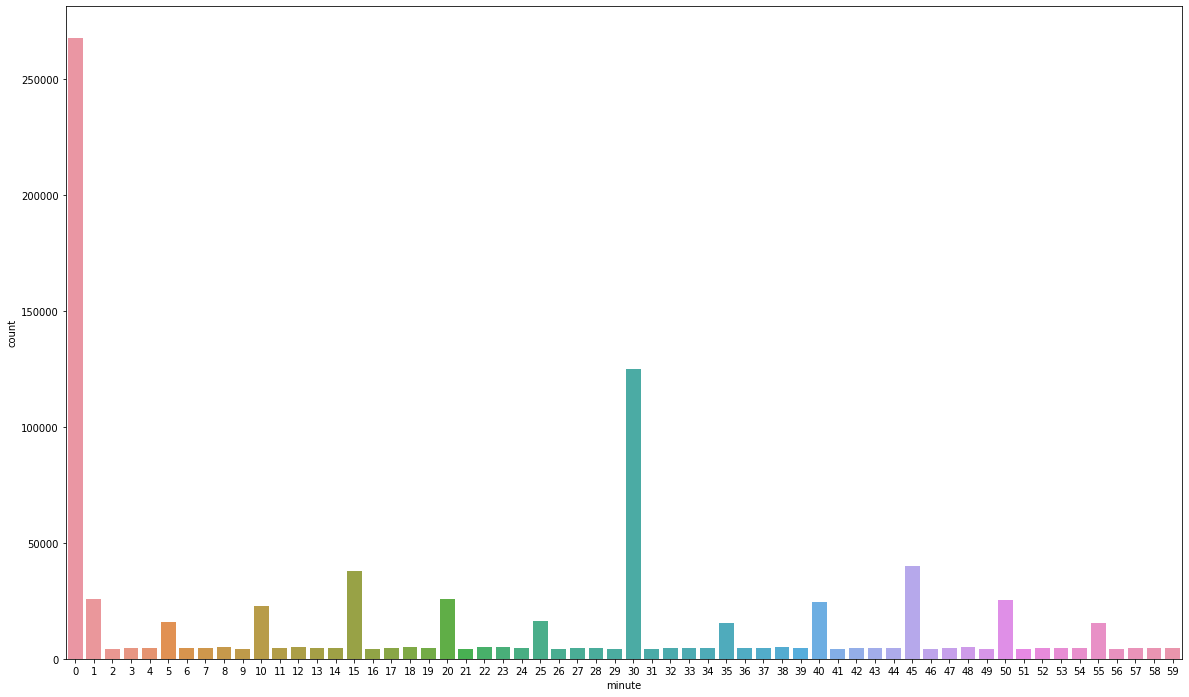

In [44]:
plt.figure(figsize=(20,12))
sns.countplot(x="minute", data=train)

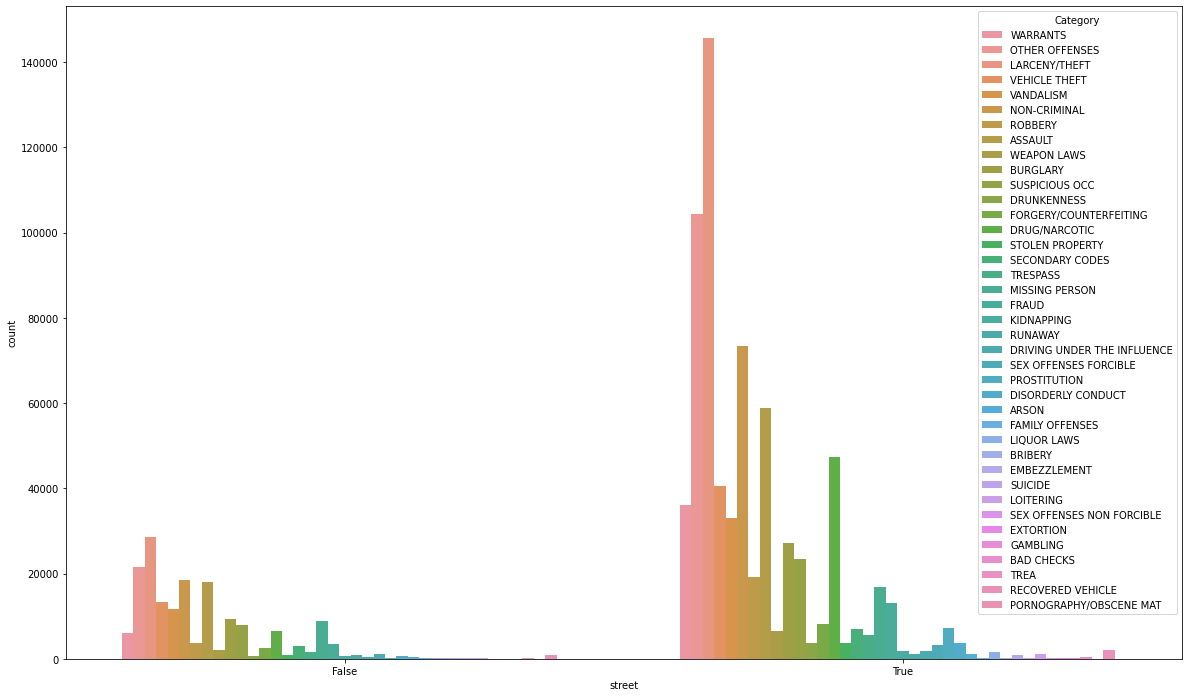

In [45]:
plt.figure(figsize=(20,12))
sns.countplot(x="street", data=train,hue="Category")

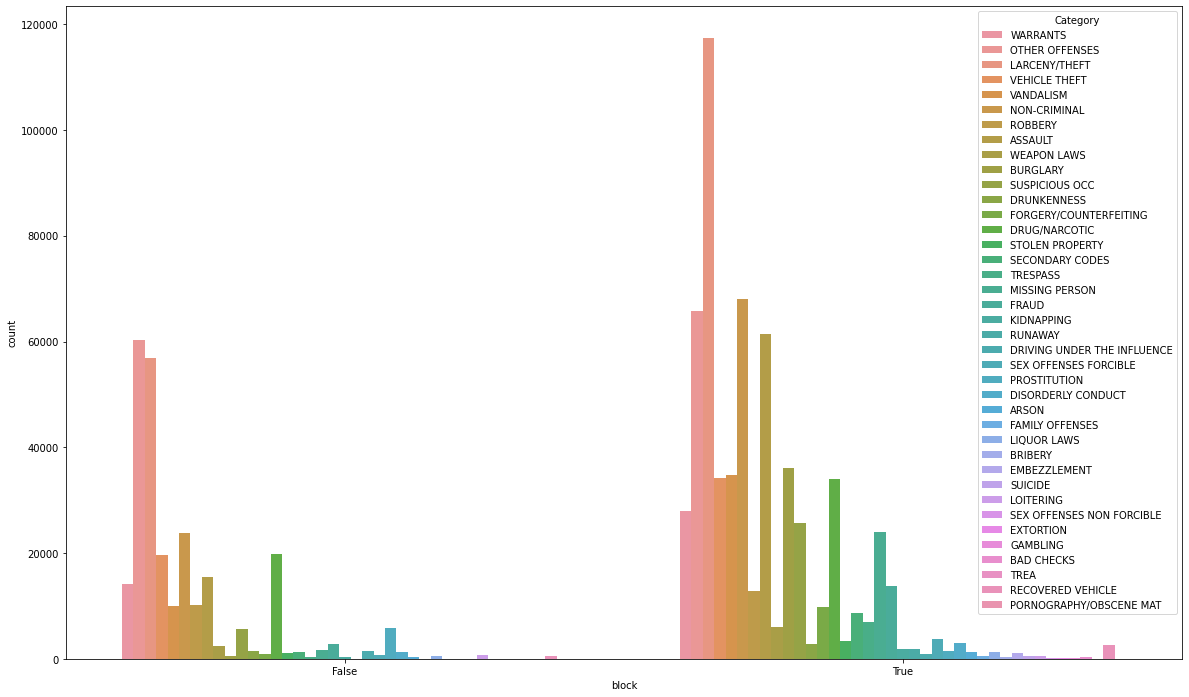

In [46]:
plt.figure(figsize=(20,12))
sns.countplot(x="block", data=train,hue="Category")

In [47]:
train.groupby("Category")["street"].mean().sort_values()

Category
FAMILY OFFENSES                0.534836
RUNAWAY                        0.559134
SUICIDE                        0.590551
MISSING PERSON                 0.654486
SEX OFFENSES NON FORCIBLE      0.662162
PORNOGRAPHY/OBSCENE MAT        0.681818
ARSON                          0.682540
RECOVERED VEHICLE              0.694764
SECONDARY CODES                0.707185
BRIBERY                        0.709343
VANDALISM                      0.739166
KIDNAPPING                     0.740171
BURGLARY                       0.744802
SUSPICIOUS OCC                 0.747961
WEAPON LAWS                    0.749591
VEHICLE THEFT                  0.753469
SEX OFFENSES FORCIBLE          0.754739
EXTORTION                      0.757812
FORGERY/COUNTERFEITING         0.761707
ASSAULT                        0.765502
BAD CHECKS                     0.766010
EMBEZZLEMENT                   0.767182
TRESPASS                       0.778598
FRAUD                          0.791729
DRIVING UNDER THE INFLUENCE    

In [48]:
train.groupby("Category")["minute"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ARSON,1512.0,23.836640,18.267384,0.0,6.00,24.5,40.00,59.0
ASSAULT,76811.0,22.699171,18.319795,0.0,1.00,23.0,38.00,59.0
BAD CHECKS,406.0,7.460591,14.329187,0.0,0.00,0.0,1.00,55.0
BRIBERY,289.0,21.643599,17.997520,0.0,1.00,20.0,36.00,59.0
BURGLARY,36599.0,15.904369,17.681269,0.0,0.00,9.0,30.00,59.0
DISORDERLY CONDUCT,4311.0,25.969149,18.145243,0.0,10.00,28.0,41.00,59.0
DRIVING UNDER THE INFLUENCE,2268.0,28.011023,17.263043,0.0,13.00,28.0,43.00,59.0
DRUG/NARCOTIC,53919.0,27.856433,17.595600,0.0,13.00,29.0,43.00,59.0
DRUNKENNESS,4277.0,27.708440,17.572830,0.0,13.00,28.0,44.00,59.0


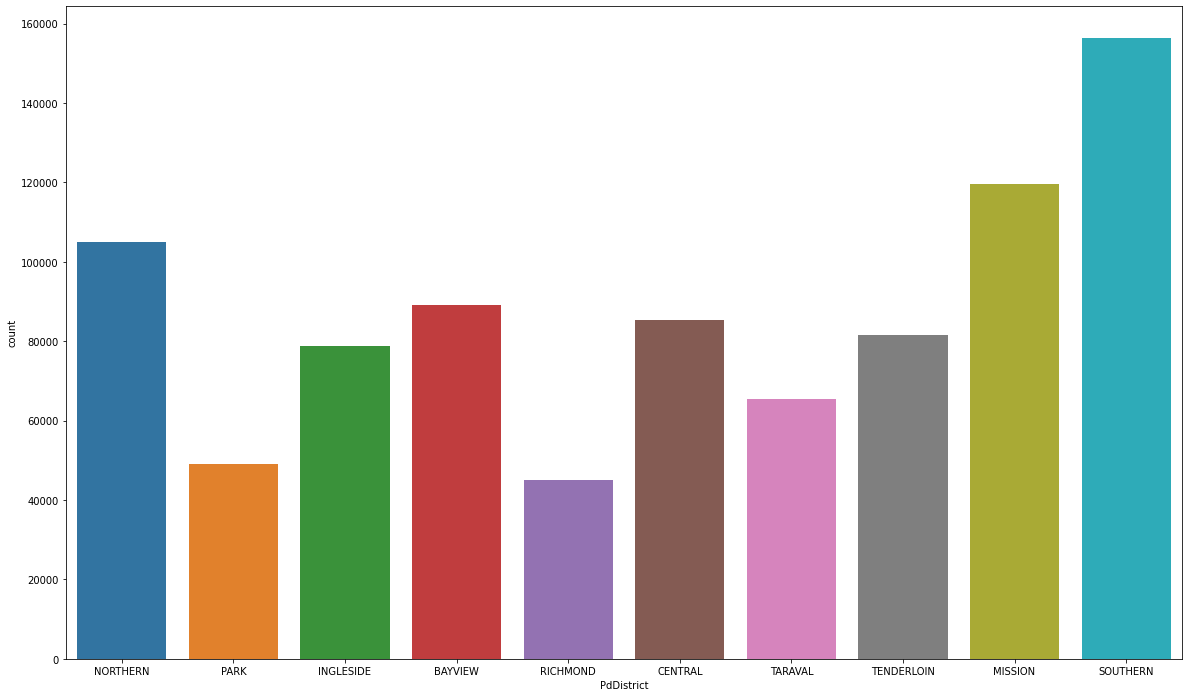

In [49]:
plt.figure(figsize=(20,12))
sns.countplot(x="PdDistrict", data=train)

In [50]:
train["DayOfWeek"] = train["Dates"].dt.weekday
test["DayOfWeek"] = test["Dates"].dt.weekday

In [51]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,4510,True,False,True,True
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,4510,True,True,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,4510,True,True,False,False


In [52]:
train.drop(columns=['Descript','Resolution','Dates'], inplace=True)

In [53]:
test.drop(columns=['Dates'], inplace=True)

In [54]:
train.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
1,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
2,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,4510,True,False,True,True
3,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,4510,True,True,False,False
4,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,4510,True,True,False,False


In [55]:
test.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,0,6,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,4512,False,True,True,False
1,1,6,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,4512,True,False,True,True
2,2,6,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,4512,True,True,False,False
3,3,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False
4,4,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
le2.fit(list(train["Address"])+list(test["Address"]))
train["Address"] = le2.transform(train["Address"])
test["Address"] = le2.transform(test["Address"])

In [58]:
train.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,WARRANTS,2,4,20879,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
1,OTHER OFFENSES,2,4,20879,-122.425892,37.774599,2015,5,13,23,53,4510,True,False,False,True
2,OTHER OFFENSES,2,4,24147,-122.424363,37.800414,2015,5,13,23,33,4510,True,False,True,True
3,LARCENY/THEFT,2,4,4418,-122.426995,37.800873,2015,5,13,23,30,4510,True,True,False,False
4,LARCENY/THEFT,2,5,1923,-122.438738,37.771541,2015,5,13,23,30,4510,True,True,False,False


In [59]:
test.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,0,6,0,6626,-122.399588,37.735051,2015,5,10,23,59,4512,False,True,True,False
1,1,6,0,10067,-122.391523,37.732432,2015,5,10,23,51,4512,True,False,True,True
2,2,6,4,6553,-122.426002,37.792212,2015,5,10,23,50,4512,True,True,False,False
3,3,6,2,10983,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False
4,4,6,2,10983,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False


In [60]:
test.drop(columns=['Id'], inplace=True)

In [61]:
test.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
0,6,0,6626,-122.399588,37.735051,2015,5,10,23,59,4512,False,True,True,False
1,6,0,10067,-122.391523,37.732432,2015,5,10,23,51,4512,True,False,True,True
2,6,4,6553,-122.426002,37.792212,2015,5,10,23,50,4512,True,True,False,False
3,6,2,10983,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False
4,6,2,10983,-122.437394,37.721412,2015,5,10,23,45,4512,True,True,False,False


In [62]:
x_data = train.drop("Category",axis=1)

In [63]:
x_data.shape

(875659, 15)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_data,train["Category"],test_size=0.2,random_state=7,stratify=train["Category"])

In [65]:
x_train

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,n_days,street,block,av,cross
505852,0,4,6844,-122.431184,37.788207,2008,3,31,10,0,1911,True,True,False,False
195494,5,2,518,-122.457255,37.726914,2012,10,6,19,30,3561,True,True,False,False
137729,6,7,1586,-122.388380,37.783310,2013,7,14,16,30,3842,True,True,False,False
834897,6,4,4184,-122.424252,37.787287,2003,7,27,18,52,202,True,True,False,False
286184,2,3,6592,-122.419658,37.764221,2011,6,15,22,56,3082,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40702,2,7,12677,-122.403405,37.775421,2014,10,29,7,15,4314,True,True,False,False
800087,2,4,4719,-122.428687,37.800897,2004,1,21,20,56,380,True,True,False,False
182723,1,7,11395,-122.399911,37.790560,2012,12,11,10,15,3627,True,True,False,False
266265,2,0,22435,-122.402109,37.724038,2011,10,5,13,26,3194,False,False,True,True


In [66]:
pd.Series(y_valid).value_counts()

LARCENY/THEFT                  34861
OTHER OFFENSES                 25189
NON-CRIMINAL                   18382
ASSAULT                        15362
DRUG/NARCOTIC                  10784
VEHICLE THEFT                  10740
VANDALISM                       8916
WARRANTS                        8428
BURGLARY                        7320
SUSPICIOUS OCC                  6279
MISSING PERSON                  5134
ROBBERY                         4597
FRAUD                           3327
FORGERY/COUNTERFEITING          2118
SECONDARY CODES                 1996
WEAPON LAWS                     1710
PROSTITUTION                    1489
TRESPASS                        1463
STOLEN PROPERTY                  907
SEX OFFENSES FORCIBLE            876
DISORDERLY CONDUCT               862
DRUNKENNESS                      855
RECOVERED VEHICLE                626
KIDNAPPING                       468
DRIVING UNDER THE INFLUENCE      454
LIQUOR LAWS                      380
RUNAWAY                          379
A

In [67]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(task_type="GPU")
model.fit(x_train,y_train,eval_set=(x_valid,y_valid))

Learning rate set to 0.203807
0:	learn: 3.0089747	test: 3.0096324	best: 3.0096324 (0)	total: 99.9ms	remaining: 1m 39s
1:	learn: 2.8356908	test: 2.8365108	best: 2.8365108 (1)	total: 176ms	remaining: 1m 28s
2:	learn: 2.7197396	test: 2.7210422	best: 2.7210422 (2)	total: 248ms	remaining: 1m 22s
3:	learn: 2.6454467	test: 2.6470849	best: 2.6470849 (3)	total: 326ms	remaining: 1m 21s
4:	learn: 2.5940292	test: 2.5958159	best: 2.5958159 (4)	total: 399ms	remaining: 1m 19s
5:	learn: 2.5527348	test: 2.5548704	best: 2.5548704 (5)	total: 475ms	remaining: 1m 18s
6:	learn: 2.5212254	test: 2.5235483	best: 2.5235483 (6)	total: 557ms	remaining: 1m 18s
7:	learn: 2.4984149	test: 2.5009038	best: 2.5009038 (7)	total: 631ms	remaining: 1m 18s
8:	learn: 2.4786150	test: 2.4814708	best: 2.4814708 (8)	total: 706ms	remaining: 1m 17s
9:	learn: 2.4639930	test: 2.4669244	best: 2.4669244 (9)	total: 778ms	remaining: 1m 17s
10:	learn: 2.4534349	test: 2.4565074	best: 2.4565074 (10)	total: 850ms	remaining: 1m 16s
11:	learn:

In [68]:
# %%time
# from lightgbm import LGBMClassifier
# model = LGBMClassifier()
# model.fit(x_train,y_train,eval_set=(x_vaild,y_vaild))

In [69]:
result = model.predict_proba(test)

In [70]:
result

array([[5.34351181e-04, 7.67285132e-02, 2.60677030e-07, ...,
        2.63528674e-01, 3.52583191e-02, 1.34670041e-02],
       [1.26536610e-04, 4.59557735e-02, 1.79523841e-07, ...,
        2.82602370e-03, 3.09620402e-02, 2.44811263e-02],
       [5.70526715e-03, 1.30054138e-01, 1.74587869e-06, ...,
        1.95978252e-02, 3.45655866e-02, 5.47950559e-03],
       ...,
       [8.09935190e-04, 9.22040082e-02, 3.76897321e-03, ...,
        6.54310902e-02, 8.11048276e-03, 2.50617066e-03],
       [4.72459075e-04, 8.61237753e-02, 1.11529060e-03, ...,
        2.19120836e-02, 7.17748458e-03, 9.22204433e-04],
       [1.00110437e-03, 3.43740226e-02, 4.89529693e-03, ...,
        2.20684959e-02, 7.58243458e-03, 7.46017001e-04]])

In [71]:
sub = pd.read_csv("/kaggle/input/sf-crime/sampleSubmission.csv.zip")
sub.iloc[:,1:] = result

In [72]:
sub.to_csv('SFcrime.csv', index=False)